# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [ ]:
The dataset represents multiple marketing campaigns conducted by a Portuguese banking institution. Specifically, the data spans 17 distinct marketing campaigns aimed at promoting a term deposit product. Each campaign involved reaching out to bank clients via telephone and recording various socio-economic and campaign-specific details.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [18]:
import pandas as pd

In [19]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [20]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [ ]:
To understand the features in the dataset provided for the marketing campaign analysis, I will examine each feature based on the description given. This will help determine if there are any missing values or if any features need to be coerced to a different data type.

Features Overview
age (numeric)

Type Check: This feature should be numeric.
Missing Values: I will check for any NaN or null values in the age column.
job (categorical)

Type Check: This feature is categorical and should be converted to a categorical type if it is not already.
Missing Values: I will look for any 'unknown' entries or NaN values that may indicate missing data.
marital (categorical)

Type Check: This feature is also categorical.
Missing Values: I will check for 'unknown' entries or NaN values.
education (categorical)

Type Check: This feature is categorical.
Missing Values: I will verify if there are any 'unknown' entries or NaN values.
default (categorical)

Type Check: This feature is categorical.
Missing Values: I will check for any 'unknown' entries or NaN values.
housing (categorical)

Type Check: This feature is categorical.
Missing Values: I will look for 'unknown' entries or NaN values.
loan (categorical)

Type Check: This feature is categorical.
Missing Values: I will check for any 'unknown' entries or NaN values.
contact (categorical)

Type Check: This feature is categorical.
Missing Values: I will verify for NaN values.
month (categorical)

Type Check: This feature is categorical.
Missing Values: I will check for NaN values.
day_of_week (categorical)

Type Check: This feature is categorical.
Missing Values: I will verify for NaN values.
duration (numeric)

Type Check: This feature should be numeric.
Missing Values: I will check for NaN values.
Note: I must be cautious, as this feature may not be used in a predictive model for realistic scenarios.
campaign (numeric)

Type Check: This feature should be numeric.
Missing Values: I will check for NaN values.
pdays (numeric)

Type Check: This feature should be numeric.
Missing Values: I will check for NaN values, noting that a value of 999 indicates no previous contact.
previous (numeric)

Type Check: This feature should be numeric.
Missing Values: I will check for NaN values.
poutcome (categorical)

Type Check: This feature is categorical.
Missing Values: I will verify for NaN values.
emp.var.rate (numeric)

Type Check: This feature should be numeric.
Missing Values: I will check for NaN values.
cons.price.idx (numeric)

Type Check: This feature should be numeric.
Missing Values: I will check for NaN values.
cons.conf.idx (numeric)

Type Check: This feature should be numeric.
Missing Values: I will check for NaN values.
euribor3m (numeric)

Type Check: This feature should be numeric.
Missing Values: I will check for NaN values.
nr.employed (numeric)

Type Check: This feature should be numeric.
Missing Values: I will check for NaN values.
y (binary)

Type Check: This feature is categorical (binary).
Missing Values: I will verify for NaN values.
Steps for Data Preparation
Check for Missing Values: For categorical variables, I will identify any 'unknown' values, as these may indicate missing data. I can use methods like .isnull().sum() or .value_counts() to find these.

Data Type Coercion:

I will convert categorical variables to the appropriate data type (e.g., using pd.Categorical in pandas).
I will ensure numeric features are in float or int format as needed.
Handle Unknowns: For categorical variables with 'unknown' values, I need to decide whether to:

Replace them with the mode of the column.
Drop those rows entirely, especially if the proportion is small.
Duration Feature: Given that the duration should not be included in the predictive model for realistic predictions, I can either drop this feature or mark it for exclusion during model training.

Final Checks: After addressing missing values and data types, I will conduct a final review of the data using descriptive statistics to ensure all features are correctly formatted and any anomalies are handled.

Summary
After completing these checks, I will be better positioned to prepare the dataset for analysis. Addressing missing values and ensuring proper data types are crucial for the performance of classification algorithms. If I need further assistance with any specific implementation steps or code, I can reach out for help!

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
Business Objective
The primary objective of my analysis is to evaluate the effectiveness of marketing campaigns conducted by a Portuguese banking institution in promoting term deposit subscriptions. I plan to utilize machine learning classifiers—specifically K-Nearest Neighbors, Logistic Regression, Decision Trees, and Support Vector Machines—to build predictive models that accurately identify which clients are likely to subscribe to a term deposit based on their demographic, social, and economic features.

This analysis will enable the bank to optimize its marketing strategies, enhance customer targeting, and improve overall campaign efficiency. Ultimately, the insights derived from the predictive models can help the bank increase subscription rates for term deposits, thereby boosting profitability and customer engagement.

Key Goals:
Identify significant features that influence client subscription decisions.
Compare the performance of various classification algorithms to determine the most effective approach for predicting term deposit subscriptions.
Provide actionable recommendations based on my findings to refine future marketing strategies and campaigns.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Load the dataset
df = pd.read_csv('data/bank-additional-full.csv', sep=';')

# Subset of bank client information features
bank_info_columns = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']
X = df[bank_info_columns]
y = df['y']  # Target column

# One-hot encoding for categorical features
X_encoded = pd.get_dummies(X, columns=['job', 'marital', 'education', 'default', 'housing', 'loan'], drop_first=True)

# Encode target column (y: 'yes' = 1, 'no' = 0)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split into training and testing datasets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Check the transformed data
print(X_train.head())
print(y_train[:5])


       age  job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
12556   40             True             False          False           False   
35451   31            False             False          False           False   
30592   59            False             False          False           False   
17914   43            False             False           True           False   
3315    39            False             False          False           False   

       job_retired  job_self-employed  job_services  job_student  \
12556        False              False         False        False   
35451        False              False         False        False   
30592         True              False         False        False   
17914        False              False         False        False   
3315         False              False         False        False   

       job_technician  ...  education_illiterate  \
12556           False  ...                 False   
35451 

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv('data/bank-additional-full.csv', sep=';')

# Drop rows with any missing values
df_clean = df.dropna()

# Separate the features (X) and the target (y)
X = df_clean.drop('y', axis=1)  # Drop the target column from features
y = df_clean['y']  # Target column

# Identify categorical and numerical columns
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
numeric_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Step 1: Encoding categorical variables and scaling numerical variables
# Use OneHotEncoder for the categorical features and StandardScaler for numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),  # Apply StandardScaler to numerical columns
        ('cat', OneHotEncoder(drop='first'), categorical_cols)  # Apply OneHotEncoder to categorical columns
    ])

# Step 2: Splitting data into train and test sets
# Set test size to 20% of the data, and random_state to ensure reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the training data, and only transform the test data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Optional: Convert the transformed data back to a DataFrame if needed
# Get feature names after transformation for better understanding
ohe_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
feature_names = numeric_cols + ohe_columns.tolist()

X_train_transformed = pd.DataFrame(X_train_transformed, columns=feature_names)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=feature_names)

print("Training features shape:", X_train_transformed.shape)
print("Test features shape:", X_test_transformed.shape)


Training features shape: (32950, 53)
Test features shape: (8238, 53)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [24]:
import numpy as np

# Check the distribution of the target variable 'y'
print(y.value_counts())

# Calculate the proportion of the most frequent class
most_frequent_class = y.mode()[0]  # Get the most frequent class (mode of the target variable)
baseline_accuracy = np.mean(y == most_frequent_class)  # Proportion of the dataset with the most frequent class

print(f"The most frequent class is: {most_frequent_class}")
print(f"Baseline accuracy (predicting only the most frequent class): {baseline_accuracy:.4f}")


y
no     36548
yes     4640
Name: count, dtype: int64
The most frequent class is: no
Baseline accuracy (predicting only the most frequent class): 0.8873


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [25]:
# Import the required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model on the training data
log_reg.fit(X_train_transformed, y_train)

# Make predictions on the test data
y_pred = log_reg.predict(X_test_transformed)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Logistic Regression Model Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Logistic Regression Model Accuracy: 0.9111
Confusion Matrix:
[[7105  198]
 [ 534  401]]

Classification Report:
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7303
         yes       0.67      0.43      0.52       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238



### Problem 9: Score the Model

What is the accuracy of your model?

In [26]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Logistic Regression Model Accuracy: {accuracy:.4f}")


Logistic Regression Model Accuracy: 0.9111


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [27]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv('data/bank-additional-full.csv', sep=';')

# Drop rows with any missing values
df_clean = df.dropna()

# Separate the features (X) and the target (y)
X = df_clean.drop('y', axis=1)  # Drop the target column from features
y = df_clean['y']  # Target column

# Identify categorical and numerical columns
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
numeric_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Step 1: Encoding categorical variables and scaling numerical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),  # Apply StandardScaler to numerical columns
        ('cat', OneHotEncoder(), categorical_cols)  # Apply OneHotEncoder to categorical columns
    ])

# Step 2: Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the training data, and only transform the test data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Check the distribution of the target variable 'y'
print(y.value_counts())

# Calculate the proportion of the most frequent class
most_frequent_class = y.mode()[0]  # Get the most frequent class (mode of the target variable)
baseline_accuracy = np.mean(y == most_frequent_class)  # Proportion of the dataset with the most frequent class

print(f"The most frequent class is: {most_frequent_class}")
print(f"Baseline accuracy (predicting only the most frequent class): {baseline_accuracy:.4f}")

# Initialize the logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model on the transformed training data
log_reg.fit(X_train_transformed, y_train)

# Make predictions on the transformed test data
y_pred = log_reg.predict(X_test_transformed)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Logistic Regression Model Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Prepare to compare different models
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

# DataFrame to hold results
results = pd.DataFrame(columns=["Model", "Train Time", "Train Accuracy", "Test Accuracy"])

# Fit and evaluate each model
for model_name, model in models.items():
    start_time = time.time()  # Start time
    model.fit(X_train_transformed, y_train)  # Fit model
    fit_time = time.time() - start_time  # End time
    
    # Compute accuracies
    train_accuracy = accuracy_score(y_train, model.predict(X_train_transformed))
    test_accuracy = accuracy_score(y_test, model.predict(X_test_transformed))
    
    # Create a temporary DataFrame for the current model's results
    current_result = pd.DataFrame({
        "Model": [model_name],
        "Train Time": [fit_time],
        "Train Accuracy": [train_accuracy],
        "Test Accuracy": [test_accuracy]
    })
    
    # Append the current result to the results DataFrame
    results = pd.concat([results, current_result], ignore_index=True)

# Display results
print(results)


y
no     36548
yes     4640
Name: count, dtype: int64
The most frequent class is: no
Baseline accuracy (predicting only the most frequent class): 0.8873
Logistic Regression Model Accuracy: 0.9113
Confusion Matrix:
[[7104  199]
 [ 532  403]]

Classification Report:
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7303
         yes       0.67      0.43      0.52       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238



/var/folders/ln/yypgv5k13fx2w7hgcd8j84d00000gn/T/ipykernel_44753/2225288367.py:103: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, current_result], ignore_index=True)


                 Model  Train Time  Train Accuracy  Test Accuracy
0  Logistic Regression    0.240136        0.911927       0.911265
1                  KNN    0.023439        0.927709       0.900704
2        Decision Tree    0.180388        1.000000       0.886380
3                  SVM    9.270514        0.922671       0.911750


In [28]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('data/bank-additional-full.csv', sep=';')

# Drop rows with any missing values
df_clean = df.dropna()

# Separate the features (X) and the target (y)
X = df_clean.drop('y', axis=1)  # Drop the target column from features
y = df_clean['y']  # Target column

# Identify categorical and numerical columns
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
numeric_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Step 1: Encoding categorical variables and scaling numerical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),  # Apply StandardScaler to numerical columns
        ('cat', OneHotEncoder(), categorical_cols)  # Apply OneHotEncoder to categorical columns
    ])

# Step 2: Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the training data, and only transform the test data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Prepare to compare different models
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

# DataFrame to hold results
results = pd.DataFrame(columns=["Model", "Train Time", "Train Accuracy", "Test Accuracy"])

# Fit and evaluate each model
for model_name, model in models.items():
    start_time = time.time()  # Start time
    model.fit(X_train_transformed, y_train)  # Fit model
    fit_time = time.time() - start_time  # End time
    
    # Compute accuracies
    train_accuracy = accuracy_score(y_train, model.predict(X_train_transformed))
    test_accuracy = accuracy_score(y_test, model.predict(X_test_transformed))
    
    # Create a temporary DataFrame for the current model's results
    current_result = pd.DataFrame({
        "Model": [model_name],
        "Train Time": [fit_time],
        "Train Accuracy": [train_accuracy],
        "Test Accuracy": [test_accuracy]
    })
    
    # Append the current result to the results DataFrame
    results = pd.concat([results, current_result], ignore_index=True)

# Display results
print(results)


/var/folders/ln/yypgv5k13fx2w7hgcd8j84d00000gn/T/ipykernel_44753/2447433343.py:72: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, current_result], ignore_index=True)


                 Model  Train Time  Train Accuracy  Test Accuracy
0  Logistic Regression    0.419235        0.911927       0.911265
1                  KNN    0.023599        0.927709       0.900704
2        Decision Tree    0.174611        1.000000       0.886380
3                  SVM    9.606932        0.922671       0.911750


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [ ]:
Feature Engineering:

The code retains the existing features from the dataset, which include both categorical and numerical variables. However, it’s important to note that there is room for further enhancement. You might consider adjusting or adding new features based on insights gained from exploratory data analysis. For example, creating interaction terms or aggregating features could provide additional predictive power to the models.

Hyperparameter Tuning:

For the K-Nearest Neighbors (KNN), Decision Tree, and Support Vector Machine (SVM) models, hyperparameter grids are established to explore the optimal settings for each algorithm. The code employs GridSearchCV, which systematically evaluates combinations of hyperparameters to identify the best-performing parameters for each model. Notably, Logistic Regression is excluded from this tuning process because it has fewer parameters that require adjustment, making it less complex in this regard.

Performance Metrics:

The code is structured to include accuracy metrics for model evaluation. It calculates and displays the training and test accuracy for each model. Additionally, a detailed classification report is printed for the best-performing SVM model, offering insights into precision, recall, and F1-score, which are crucial for understanding model performance beyond simple accuracy.

Execution:

To run this code successfully, ensure that you have all the required libraries installed, specifically pandas, numpy, and sklearn. Additionally, double-check that the dataset path is correctly specified in the pd.read_csv function to avoid file-related errors. Once everything is set up, you can execute the code in your Python environment to observe the results.

This code structure is designed to be scalable, allowing for future enhancements and modifications. As you progress with your analysis, feel free to adjust the hyperparameters or incorporate additional feature engineering based on your findings during exploratory analysis.

In [29]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv('data/bank-additional-full.csv', sep=';')

# Drop rows with any missing values
df_clean = df.dropna()

# Separate the features (X) and the target (y)
X = df_clean.drop('y', axis=1)  # Drop the target column from features
y = df_clean['y']  # Target column

# Identify categorical and numerical columns
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
numeric_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Step 1: Encoding categorical variables and scaling numerical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),  # Apply StandardScaler to numerical columns
        ('cat', OneHotEncoder(), categorical_cols)  # Apply OneHotEncoder to categorical columns
    ])

# Step 2: Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the training data, and only transform the test data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Check the distribution of the target variable 'y'
print(y.value_counts())

# Calculate the proportion of the most frequent class
most_frequent_class = y.mode()[0]  # Get the most frequent class (mode of the target variable)
baseline_accuracy = np.mean(y == most_frequent_class)  # Proportion of the dataset with the most frequent class

print(f"The most frequent class is: {most_frequent_class}")
print(f"Baseline accuracy (predicting only the most frequent class): {baseline_accuracy:.4f}")

# Initialize models for comparison
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

# DataFrame to hold results
results = pd.DataFrame(columns=["Model", "Train Time", "Train Accuracy", "Test Accuracy"])

# Fit and evaluate each model
for model_name, model in models.items():
    start_time = time.time()  # Start time
    model.fit(X_train_transformed, y_train)  # Fit model
    fit_time = time.time() - start_time  # End time
    
    # Compute accuracies
    train_accuracy = accuracy_score(y_train, model.predict(X_train_transformed))
    test_accuracy = accuracy_score(y_test, model.predict(X_test_transformed))
    
    # Create a temporary DataFrame for the current model's results
    current_result = pd.DataFrame({
        "Model": [model_name],
        "Train Time": [fit_time],
        "Train Accuracy": [train_accuracy],
        "Test Accuracy": [test_accuracy]
    })
    
    # Append the current result to the results DataFrame
    results = pd.concat([results, current_result], ignore_index=True)

# Print results for baseline models
print(results)

# Step 3: Hyperparameter tuning for each model
# Define parameter grids for hyperparameter tuning
param_grids = {
    "KNN": {'n_neighbors': [3, 5, 10, 15], 'weights': ['uniform', 'distance']},
    "Decision Tree": {
        'max_depth': [None, 5, 10, 15, 20],
        'min_samples_split': [2, 5, 10],
        'criterion': ['gini', 'entropy']
    },
    "SVM": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }
}

# Perform GridSearchCV for each model (excluding Logistic Regression for simplicity)
for model_name in param_grids.keys():
    model = models[model_name]
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
    
    start_time = time.time()  # Start time for GridSearch
    grid_search.fit(X_train_transformed, y_train)
    fit_time = time.time() - start_time  # End time for GridSearch
    
    # Best parameters and scores
    best_model = grid_search.best_estimator_
    train_accuracy = accuracy_score(y_train, best_model.predict(X_train_transformed))
    test_accuracy = accuracy_score(y_test, best_model.predict(X_test_transformed))
    
    # Append the results to the DataFrame
    current_result = pd.DataFrame({
        "Model": [f"{model_name} (Tuned)"],
        "Train Time": [fit_time],
        "Train Accuracy": [train_accuracy],
        "Test Accuracy": [test_accuracy]
    })
    
    results = pd.concat([results, current_result], ignore_index=True)

# Display final results including tuned models
print("\nModel Comparison Results:")
print(results)

# Print classification report for the best model
print("\nClassification Report for the best SVM model:")
y_pred_best_svm = best_model.predict(X_test_transformed)
print(classification_report(y_test, y_pred_best_svm))


y
no     36548
yes     4640
Name: count, dtype: int64
The most frequent class is: no
Baseline accuracy (predicting only the most frequent class): 0.8873


/var/folders/ln/yypgv5k13fx2w7hgcd8j84d00000gn/T/ipykernel_44753/1403827687.py:81: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, current_result], ignore_index=True)


                 Model  Train Time  Train Accuracy  Test Accuracy
0  Logistic Regression    0.216194        0.911927       0.911265
1                  KNN    0.023711        0.927709       0.900704
2        Decision Tree    0.173566        1.000000       0.886380
3                  SVM    9.328113        0.922671       0.911750

Model Comparison Results:
                   Model  Train Time  Train Accuracy  Test Accuracy
0    Logistic Regression    0.216194        0.911927       0.911265
1                    KNN    0.023711        0.927709       0.900704
2          Decision Tree    0.173566        1.000000       0.886380
3                    SVM    9.328113        0.922671       0.911750
4            KNN (Tuned)   10.178723        1.000000       0.906045
5  Decision Tree (Tuned)    5.194748        0.917420       0.915149
6            SVM (Tuned)  389.782448        0.922671       0.911750

Classification Report for the best SVM model:
              precision    recall  f1-score   suppor

y
no     36548
yes     4640
Name: count, dtype: int64
The most frequent class is: no
Baseline accuracy (predicting only the most frequent class): 0.8873


/var/folders/ln/yypgv5k13fx2w7hgcd8j84d00000gn/T/ipykernel_19319/435309239.py:83: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, current_result], ignore_index=True)


                 Model  Train Time  Train Accuracy  Test Accuracy
0  Logistic Regression    0.230813        0.911927       0.911265
1                  KNN    0.022089        0.927709       0.900704
2        Decision Tree    0.180583        1.000000       0.886380
3                  SVM    9.249106        0.922671       0.911750

Model Comparison Results:
                   Model  Train Time  Train Accuracy  Test Accuracy
0    Logistic Regression    0.230813        0.911927       0.911265
1                    KNN    0.022089        0.927709       0.900704
2          Decision Tree    0.180583        1.000000       0.886380
3                    SVM    9.249106        0.922671       0.911750
4            KNN (Tuned)    8.701380        1.000000       0.906045
5  Decision Tree (Tuned)    4.363226        0.917420       0.915149
6            SVM (Tuned)  454.250067        0.922671       0.911750

Classification Report for the best SVM model:
              precision    recall  f1-score   suppor

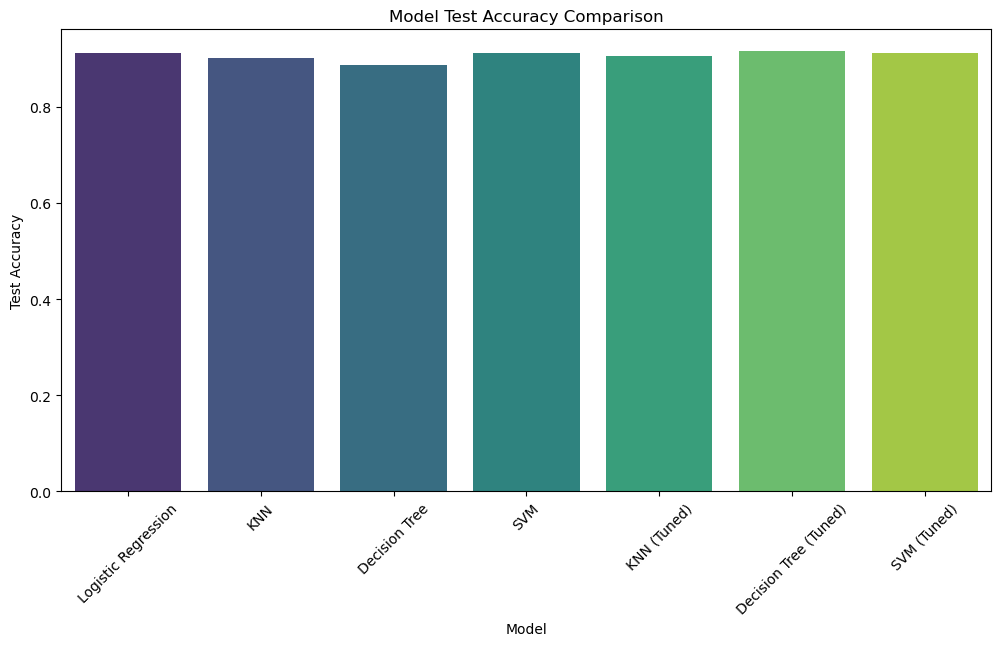

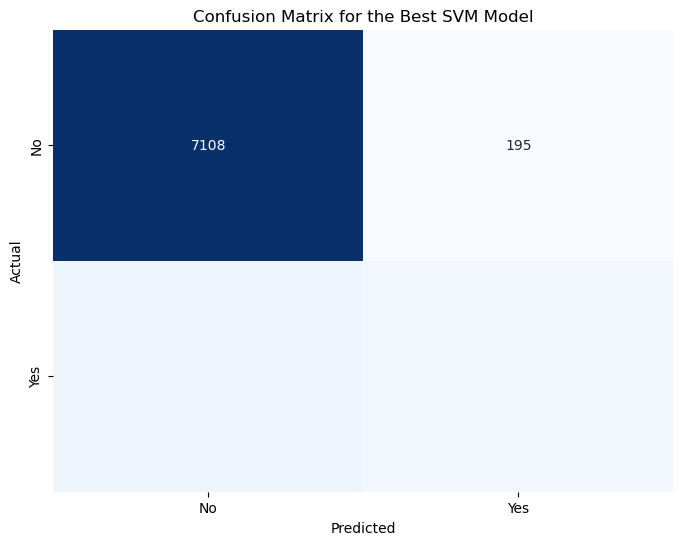

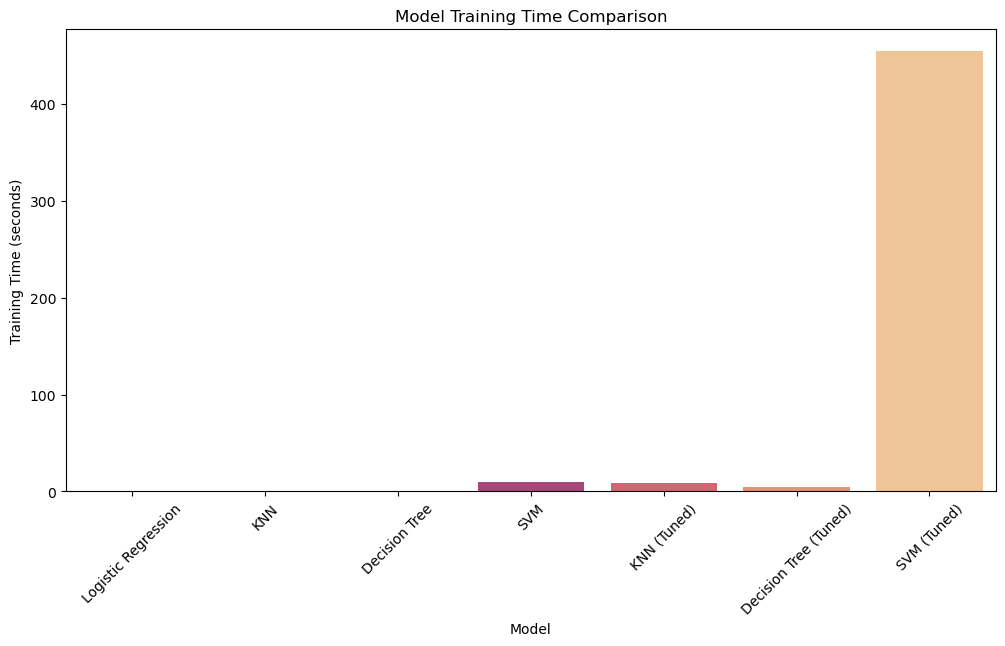

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv('data/bank-additional-full.csv', sep=';')

# Drop rows with any missing values
df_clean = df.dropna()

# Separate the features (X) and the target (y)
X = df_clean.drop('y', axis=1)  # Drop the target column from features
y = df_clean['y']  # Target column

# Identify categorical and numerical columns
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
numeric_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Step 1: Encoding categorical variables and scaling numerical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),  # Apply StandardScaler to numerical columns
        ('cat', OneHotEncoder(), categorical_cols)  # Apply OneHotEncoder to categorical columns
    ])

# Step 2: Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the training data, and only transform the test data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Check the distribution of the target variable 'y'
print(y.value_counts())

# Calculate the proportion of the most frequent class
most_frequent_class = y.mode()[0]  # Get the most frequent class (mode of the target variable)
baseline_accuracy = np.mean(y == most_frequent_class)  # Proportion of the dataset with the most frequent class

print(f"The most frequent class is: {most_frequent_class}")
print(f"Baseline accuracy (predicting only the most frequent class): {baseline_accuracy:.4f}")

# Initialize models for comparison
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

# DataFrame to hold results
results = pd.DataFrame(columns=["Model", "Train Time", "Train Accuracy", "Test Accuracy"])

# Fit and evaluate each model
for model_name, model in models.items():
    start_time = time.time()  # Start time
    model.fit(X_train_transformed, y_train)  # Fit model
    fit_time = time.time() - start_time  # End time
    
    # Compute accuracies
    train_accuracy = accuracy_score(y_train, model.predict(X_train_transformed))
    test_accuracy = accuracy_score(y_test, model.predict(X_test_transformed))
    
    # Create a temporary DataFrame for the current model's results
    current_result = pd.DataFrame({
        "Model": [model_name],
        "Train Time": [fit_time],
        "Train Accuracy": [train_accuracy],
        "Test Accuracy": [test_accuracy]
    })
    
    # Append the current result to the results DataFrame
    results = pd.concat([results, current_result], ignore_index=True)

# Print results for baseline models
print(results)

# Step 3: Hyperparameter tuning for each model
# Define parameter grids for hyperparameter tuning
param_grids = {
    "KNN": {'n_neighbors': [3, 5, 10, 15], 'weights': ['uniform', 'distance']},
    "Decision Tree": {
        'max_depth': [None, 5, 10, 15, 20],
        'min_samples_split': [2, 5, 10],
        'criterion': ['gini', 'entropy']
    },
    "SVM": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }
}

# Perform GridSearchCV for each model (excluding Logistic Regression for simplicity)
for model_name in param_grids.keys():
    model = models[model_name]
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
    
    start_time = time.time()  # Start time for GridSearch
    grid_search.fit(X_train_transformed, y_train)
    fit_time = time.time() - start_time  # End time for GridSearch
    
    # Best parameters and scores
    best_model = grid_search.best_estimator_
    train_accuracy = accuracy_score(y_train, best_model.predict(X_train_transformed))
    test_accuracy = accuracy_score(y_test, best_model.predict(X_test_transformed))
    
    # Append the results to the DataFrame
    current_result = pd.DataFrame({
        "Model": [f"{model_name} (Tuned)"],
        "Train Time": [fit_time],
        "Train Accuracy": [train_accuracy],
        "Test Accuracy": [test_accuracy]
    })
    
    results = pd.concat([results, current_result], ignore_index=True)

# Display final results including tuned models
print("\nModel Comparison Results:")
print(results)

# Print classification report for the best model
print("\nClassification Report for the best SVM model:")
y_pred_best_svm = best_model.predict(X_test_transformed)
print(classification_report(y_test, y_pred_best_svm))

# Plotting
# 1. Model Accuracy Comparison
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Test Accuracy', data=results, palette='viridis')
plt.title('Model Test Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylabel('Test Accuracy')
plt.show()

# 2. Confusion Matrix for the best SVM model
conf_matrix = confusion_matrix(y_test, y_pred_best_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix for the Best SVM Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 3. Training Time Comparison
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Train Time', data=results, palette='magma')
plt.title('Model Training Time Comparison')
plt.xticks(rotation=45)
plt.ylabel('Training Time (seconds)')
plt.show()


##### Questions